In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from imp import reload
from pathlib import Path

import seaborn as sns
sns.set_style("dark")

import sys
sys.path.append("../")

%matplotlib inline

img_base_path = Path(r"../image_data/DIP3E_Original_Images_CH03")

# 直方图处理

## 局部直方图均衡

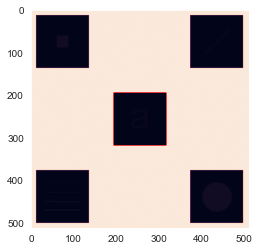

In [4]:
img_path = img_base_path.joinpath("Fig0326(a)(embedded_square_noisy_512).tif")
img = Image.open(img_path)
img = np.asarray(img)
img = img.astype(np.uint8)

plt.imshow(img)

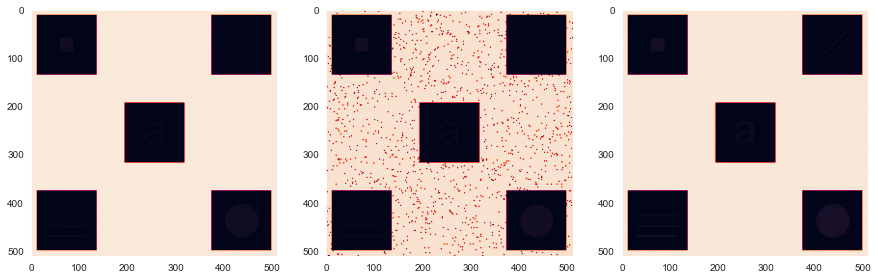

In [6]:
"""全局直方图均衡"""
global_hist_img = cv2.equalizeHist(img)

"""局部直方图均衡"""
clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(3,3))
local_hist_img  = clahe.apply(img)

_,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))

axes[0].imshow(img)
axes[1].imshow(global_hist_img)
axes[2].imshow(local_hist_img)

## 局部直方图增强

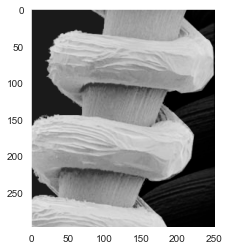

In [7]:
img = cv2.imread(str(img_base_path.joinpath("Fig0327(a)(tungsten_original).tif")))


plt.imshow(img)

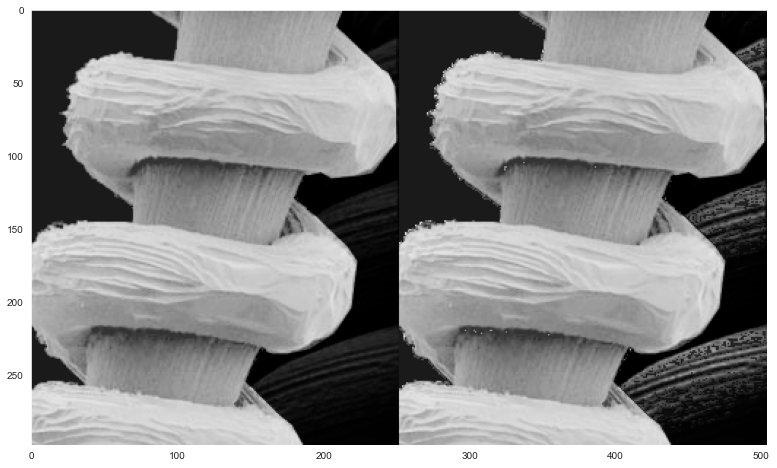

In [8]:
from src.chapter3 import hist_local_enhance
from imp import reload
reload(hist_local_enhance)


res = hist_local_enhance.local_enhance(img)

plt.figure(figsize=(15,8))
plt.imshow(np.hstack([img,res]))